In [30]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
DEVICE = 'cpu'

## Torus model

In [32]:
def model(params, center = np.array([0.6, 0.8])):
    a, b, c = params['a'], params['b'], params['c']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

par0 = dict(a=0.57, b=0.8, c=1.0)
obs0 = model(par0)  # Using Asimov data

In [33]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.], "c": ["uniform", 0., 1.]})

heavy-ion-physics-and-its-applications/8996/## Inference

In [10]:
s = swyft.NestedRatios(model, prior, noise = noise, obs = obs0, device = DEVICE)
s.run(max_rounds = 1, Ninit = 500, train_args = dict(lr_schedule = [1e-3]))

Simulate:   3%|▎         | 15/488 [00:00<00:03, 144.45it/s]

Creating new cache.
N = 500
Adding 488 new samples.


Simulate: 100%|██████████| 488/488 [00:01<00:00, 397.00it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 4.055
Validation loss: 3.622
Validation loss: 2.841
Validation loss: 2.566
Validation loss: 2.422
Validation loss: 2.417
Validation loss: 2.211
Validation loss: 2.309
Total epochs: 8
LR iteration 1
Validation loss: 2.120
Validation loss: 2.113
Validation loss: 2.290
Total epochs: 3
LR iteration 2
Validation loss: 2.111
Validation loss: 2.051
Validation loss: 2.056
Total epochs: 3
New prior volume: 0.26331566059092243
Constrained prior volume decreased by factor 0.26331566059092243
Done! 1.0 0.26331566059092243 0.5 0.9


In [34]:
post = s.gen_2d_marginals(N = 1000)

Simulate:   0%|          | 14/8008 [00:00<00:57, 138.70it/s]

Generating marginals for: [('a',), ('a', 'b'), ('a', 'c'), ('b',), ('b', 'c'), ('c',)]
Using volume: 1.0
No new simulator runs required.


Simulate: 100%|██████████| 8008/8008 [00:16<00:00, 475.33it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.623


KeyboardInterrupt: 

In [ ]:
par0 = dict(a=0.57, b=0.8, c=1.0)
obs0 = model(par0)  # Using Asimov data

post_samples = post(obs0, n_samples = 100000)

In [13]:
post_samples = s.marginals(obs0, n_samples = 10000)

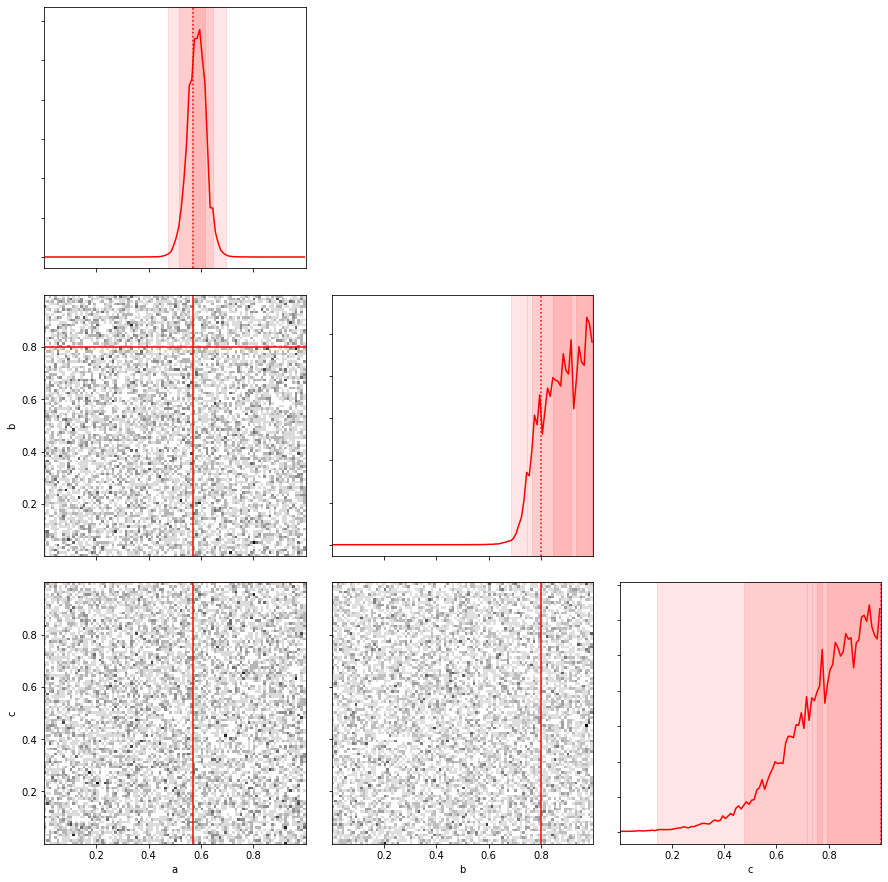

In [14]:
swyft.corner(post_samples, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

In [27]:
sd = s.state_dict();
s2 = swyft.NestedRatios.from_state_dict(sd, model)

Creating new cache.


In [28]:
post_samples = s2.marginals(obs0, n_samples = 10000)

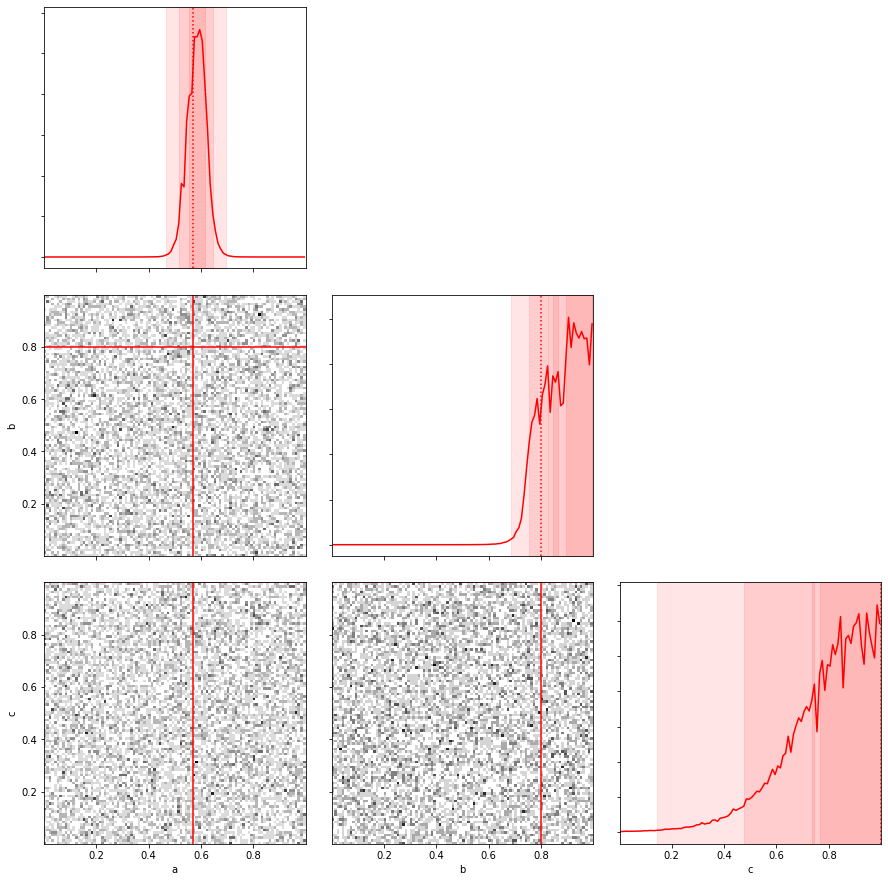

In [29]:
swyft.corner(post_samples, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)